In [1]:
import pandas as pd
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
metadata_path = '../../data/metadata/'
sim_data_path = '../../data/unigram/'
master_path = '../../data/master_tables'

In [3]:
agg_path = '../../data/agg_unigram/'

In [4]:
# fandom_list = [line.strip() for line in open('../../data/fandom_filtered_list')]

In [5]:
fandom_list = [i for i in os.listdir(agg_path) if 'tsv' in i]

In [6]:
fandom_list

['arthurian_mythology_&_related_fandoms_agg_cos.tsv',
 'attack_on_titan_agg_cos.tsv',
 'bishoujo_senshi_sailor_moon_agg_cos.tsv',
 'buffy_the_vampire_slayer_agg_cos.tsv',
 'dcu_agg_cos.tsv',
 'doctor_who_&_related_fandoms_agg_cos.tsv',
 'dragon_age_all_media_types_agg_cos.tsv',
 'haikyuu_agg_cos.tsv',
 'hamilton_miranda_agg_cos.tsv',
 'harry_potter_agg_cos.tsv',
 'hetalia_axis_powers_agg_cos.tsv',
 'homestuck_agg_cos.tsv',
 'kuroko_no_basuke_agg_cos.tsv',
 'les_miserables_all_media_types_agg_cos.tsv',
 'marvel_agg_cos.tsv',
 'ms_paint_adventures_agg_cos.tsv',
 'naruto_agg_cos.tsv',
 'one_direction_agg_cos.tsv',
 'shakespare_william_works_agg_cos.tsv',
 'sherlock_holmes_&_related_fandoms_agg_cos.tsv',
 'star_wars_all_media_types_agg_cos.tsv',
 'supernatural_agg_cos.tsv',
 'the_avengers_all_media_types_agg_cos.tsv',
 'the_walking_dead_&_related_fandoms_agg_cos.tsv',
 'tolkien_j_r_r_works_&_related_fandoms_agg_cos.tsv']

In [8]:
df = pd.read_csv(os.path.join(agg_path,'arthurian_mythology_&_related_fandoms'+'_agg_cos.tsv'), sep = '\t')

In [9]:
df.head(2)

,Author,Hits,Kudos,Title,Words,Bookmarks,CompleteDate,Chapters,UpdateDate,PublishDate,Comments,completed_in_days,Cos
0,Mizufae,5938.0,136.0,Art and Graphics for There Are No Gays In Foot...,2288.0,7,1577.0,1,NaN,1577,11,0.0,0.031677
1,Lilliburlero,252.0,2.0,A Feeling Disputation,675.0,0,1402.0,1,NaN,1402,6,0.0,0.728981


In [10]:
df.columns.values

array(['Author', 'Hits', 'Kudos', 'Title', 'Words', 'Bookmarks',
       'CompleteDate', 'Chapters', 'UpdateDate', 'PublishDate', 'Comments',
       'completed_in_days', 'Cos'], dtype=object)

In [13]:
def create_df(fname):
    ### Create table: merge the one with JSD and the master table w/ old KL
    ### Only keep the numeric variables
    df = pd.read_csv(os.path.join(agg_path,fname), sep = '\t')
    df['Cosine_distance'] = df['Cos']
    df = df[['Hits', 'Kudos', 'Words', 'Bookmarks', 'Comments', 'Chapters', 'PublishDate', 'Cosine_distance']]
#     df = df.fillna(0)
    return df

In [14]:
df_all = []
for fandom in fandom_list:
    # for some we don't have the master table.
    df_all.append(create_df(fandom))
    print ('did: ', fandom)

df_all = pd.concat(df_all)

did:  arthurian_mythology_&_related_fandoms_agg_cos.tsv
did:  attack_on_titan_agg_cos.tsv
did:  bishoujo_senshi_sailor_moon_agg_cos.tsv
did:  buffy_the_vampire_slayer_agg_cos.tsv
did:  dcu_agg_cos.tsv
did:  doctor_who_&_related_fandoms_agg_cos.tsv
did:  dragon_age_all_media_types_agg_cos.tsv
did:  haikyuu_agg_cos.tsv
did:  hamilton_miranda_agg_cos.tsv
did:  harry_potter_agg_cos.tsv
did:  hetalia_axis_powers_agg_cos.tsv
did:  homestuck_agg_cos.tsv
did:  kuroko_no_basuke_agg_cos.tsv
did:  les_miserables_all_media_types_agg_cos.tsv
did:  marvel_agg_cos.tsv
did:  ms_paint_adventures_agg_cos.tsv
did:  naruto_agg_cos.tsv
did:  one_direction_agg_cos.tsv
did:  shakespare_william_works_agg_cos.tsv
did:  sherlock_holmes_&_related_fandoms_agg_cos.tsv
did:  star_wars_all_media_types_agg_cos.tsv
did:  supernatural_agg_cos.tsv
did:  the_avengers_all_media_types_agg_cos.tsv
did:  the_walking_dead_&_related_fandoms_agg_cos.tsv
did:  tolkien_j_r_r_works_&_related_fandoms_agg_cos.tsv


In [15]:
len(df_all)

2500

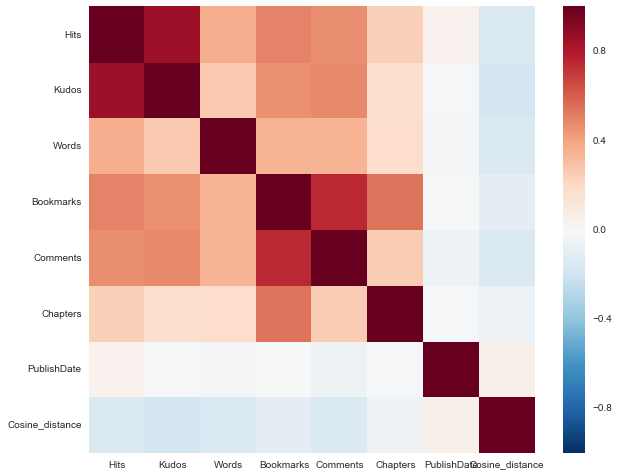

In [16]:
# plt.matshow(df.corr())
plt.figure(figsize = (10,8))
sns.heatmap(df_all.astype(float).corr())
# plt.tight_layout()
# plt.savefig('corr_heatmap_agg_1000.png', format='png')


In [39]:
df_all = df_all.astype(int)
# for col in df_all.columns.values:
#     df_all[col] = (df_all[col] - df_all[col].mean())/df_all[col].std(ddof=0)

In [43]:
df_all = df_all.fillna(0.001)

In [44]:
set(df_all.Kudos.tolist())

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 176,
 177,
 178,
 180,
 181,
 182,
 184,
 186,
 187,
 188,
 189,
 190,
 191,
 192

In [45]:
df_all.to_csv('regression_data.csv', index=False)

In [19]:
# df_all = df_all.dropna(how='any')

In [20]:
exog = df_all[['Hits', 'Words', 'Bookmarks', 'Comments', 'Chapters', 'PublishDate', 'Cosine_distance']].astype(float).as_matrix()
endog = df_all['Kudos'].astype(float).as_matrix()
mod_nbin = sm.NegativeBinomial(endog, exog)
res_nbin = mod_nbin.fit()
print(res_nbin.summary())

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                     NegativeBinomial Regression Results                      
Dep. Variable:                      y   No. Observations:                 2500
Model:               NegativeBinomial   Df Residuals:                     2493
Method:                           MLE   Df Model:                            6
Date:                Tue, 29 Aug 2017   Pseudo R-squ.:                     nan
Time:                        14:05:43   Log-Likelihood:                    nan
converged:                      False   LL-Null:                       -13157.
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1                nan        nan        nan        nan           nan       nan
x2                nan        nan        nan        nan           nan       nan
x3                nan        nan        nan        n

In [21]:
df_all.head(2)

,Hits,Kudos,Words,Bookmarks,Comments,Chapters,PublishDate,Cosine_distance
0,5938.0,136.0,2288.0,7,11,1,1577,0.031677
1,252.0,2.0,675.0,0,6,1,1402,0.728981


In [22]:
df_all.sort('Chapters',ascending=False).head()

/Users/jingy/anaconda/envs/python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Hits,Kudos,Words,Bookmarks,Comments,Chapters,PublishDate,Cosine_distance
47,50678.0,1091.0,89987.0,8740,248,19285,1254,0.043716
17,582.0,21.0,76493.0,82,1,6806,632,0.080155
7,26847.0,981.0,206306.0,10850,38,2500,1380,0.049871
27,274.0,9.0,63544.0,100,0,2500,605,0.068169
16,2105.0,138.0,196717.0,1700,152,2500,1273,0.083124


In [23]:
df_all.columns.values

array(['Hits', 'Kudos', 'Words', 'Bookmarks', 'Comments', 'Chapters',
       'PublishDate', 'Cosine_distance'], dtype=object)

In [30]:
set(df_all.Kudos.tolist())

{1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139.0,
 140

In [25]:
np.log(2)

0.69314718055994529

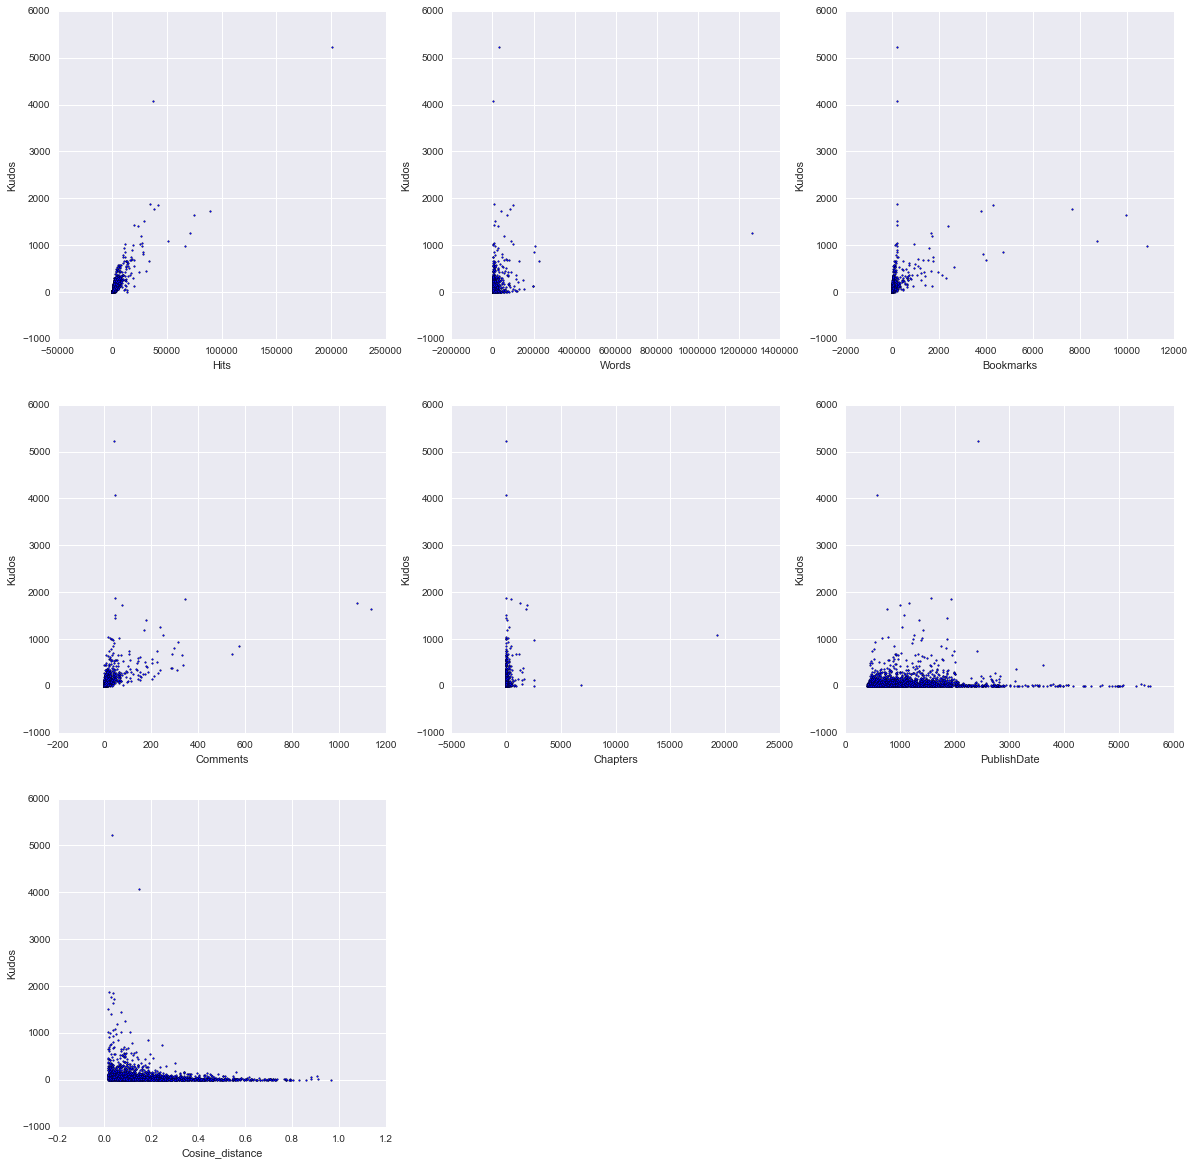

In [26]:
plt.figure(figsize=(20,20))
for i, field in enumerate(['Hits', 'Words', 'Bookmarks', 'Comments', 'Chapters','PublishDate', 'Cosine_distance']):
    plt.subplot(3, 3, i+1)
    plt.scatter(df_all[field], df_all['Kudos'],s=3)
    plt.xlabel(field)
#     plt.title(field)
    plt.ylabel('Kudos')
plt.savefig('fields_against_kudos.png',type='png')